# Q10 by MSahil

Given a Kaggle song lyrics dataset, generate songs by training a deep learning model. Specifically, train the following models: Long short-term memory (LSTM), bidirectional LSTM, one-dimension (1D) ConvNet, Gated Recurrent Unit (GRU), and deep bidirectional LSTM. 

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import string
import numpy as np
import pandas as pd
import tensorflow.keras.utils as ku 
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, SimpleRNN, GRU
from keras.layers import Conv1D, GlobalMaxPooling1D

import matplotlib.pyplot as plt

In [2]:
def tokenize_corpus(corpus, num_words=-1):
  
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer

def create_lyrics_corpus(dataset, field):
  
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')
  
  dataset[field] = dataset[field].str.lower()
  
  lyrics = dataset[field].str.cat()
  corpus = lyrics.split('\n')
  
  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()
 
  corpus = [l for l in corpus if l != '']
  return corpus
def tokenize_corpus(corpus, num_words=-1):
 
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer


In [3]:
# Read the dataset from csv - this time with 250 songs
dataset = pd.read_csv('songdata.csv', dtype=str)

corpus = create_lyrics_corpus(dataset, 'text')

tokenizer = tokenize_corpus(corpus, num_words=2000)
total_words = tokenizer.num_words


print(total_words)


C:\Users\muskan\AppData\Local\Temp/ipykernel_1900/2463916375.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')


2000


In [4]:
sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		sequences.append(n_gram_sequence)

# Pad sequences for equal input length 
max_sequence_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))

# Split sequences between the "input" sequence and "output" predicted word
input_sequences, labels = sequences[:,:-1], sequences[:,-1]
# One-hot encode the labels
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:

print(tokenizer.word_index['know'])
print(tokenizer.word_index['feeling'])

print(input_sequences[5])
print(input_sequences[6])

print(one_hot_labels[5])
print(one_hot_labels[6])

31
158
[  0   0   0   0   0   0   0   0   0   0   0   0   0 111  66  86 206  29
   4]
[   0    0    0    0    0    0    0    0    0    0    0    0  111   66
   86  206   29    4 1196]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [6]:
epoch = 200

# Bidirectional - LSTM

In [7]:
## Bidirectional - LSTM
sample = Sequential()
sample.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
sample.add(Bidirectional(LSTM(20)))
sample.add(Dense(total_words, activation='softmax'))
sample.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
his = sample.fit(input_sequences, one_hot_labels, epochs=epoch, verbose=1)

Epoch 1/200
1480/1480 [==============================] - 24s 13ms/step - loss: 5.9816 - accuracy: 0.0459
Epoch 2/200
1480/1480 [==============================] - 18s 12ms/step - loss: 5.6655 - accuracy: 0.0522
Epoch 3/200
1480/1480 [==============================] - 20s 13ms/step - loss: 5.4271 - accuracy: 0.0734
Epoch 4/200
1480/1480 [==============================] - 23s 16ms/step - loss: 5.2136 - accuracy: 0.0989
Epoch 5/200
1480/1480 [==============================] - 20s 14ms/step - loss: 5.0335 - accuracy: 0.1166
Epoch 6/200
1480/1480 [==============================] - 21s 14ms/step - loss: 4.8716 - accuracy: 0.1340
Epoch 7/200
1480/1480 [==============================] - 19s 13ms/step - loss: 4.7324 - accuracy: 0.1485
Epoch 8/200
1480/1480 [==============================] - 19s 13ms/step - loss: 4.6041 - accuracy: 0.1617
Epoch 9/200
1480/1480 [==============================] - 20s 13ms/step - loss: 4.4880 - accuracy: 0.1747
Epoch 10/200
1480/1480 [==============================]

1480/1480 [==============================] - 21s 14ms/step - loss: 2.0550 - accuracy: 0.5499
Epoch 155/200
1480/1480 [==============================] - 22s 15ms/step - loss: 2.0302 - accuracy: 0.5557
Epoch 156/200
1480/1480 [==============================] - 21s 14ms/step - loss: 2.0239 - accuracy: 0.5569
Epoch 157/200
1480/1480 [==============================] - 21s 14ms/step - loss: 2.0582 - accuracy: 0.5494
Epoch 158/200
1480/1480 [==============================] - 21s 14ms/step - loss: 2.0517 - accuracy: 0.5492
Epoch 159/200
1480/1480 [==============================] - 21s 14ms/step - loss: 2.0856 - accuracy: 0.5416
Epoch 160/200
1480/1480 [==============================] - 21s 14ms/step - loss: 2.0267 - accuracy: 0.5551
Epoch 161/200
1480/1480 [==============================] - 21s 14ms/step - loss: 2.0121 - accuracy: 0.5581
Epoch 162/200
1480/1480 [==============================] - 22s 15ms/step - loss: 2.0105 - accuracy: 0.5577
Epoch 163/200
1480/1480 [==========================

# LSTM

In [8]:
sample1 = Sequential()
sample1.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
sample1.add(LSTM(20))
sample1.add(Dense(total_words, activation='softmax'))
sample1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
his1 = sample1.fit(input_sequences, one_hot_labels, epochs=epoch, verbose=1)

Epoch 1/200
1480/1480 [==============================] - 20s 12ms/step - loss: 6.0293 - accuracy: 0.0463
Epoch 2/200
1480/1480 [==============================] - 18s 12ms/step - loss: 5.7656 - accuracy: 0.0481
Epoch 3/200
1480/1480 [==============================] - 18s 12ms/step - loss: 5.6041 - accuracy: 0.0520
Epoch 4/200
1480/1480 [==============================] - 18s 12ms/step - loss: 5.4178 - accuracy: 0.0764
Epoch 5/200
1480/1480 [==============================] - 18s 12ms/step - loss: 5.2520 - accuracy: 0.1036
Epoch 6/200
1480/1480 [==============================] - 19s 13ms/step - loss: 5.1086 - accuracy: 0.1195
Epoch 7/200
1480/1480 [==============================] - 18s 12ms/step - loss: 4.9719 - accuracy: 0.1317
Epoch 8/200
1480/1480 [==============================] - 18s 12ms/step - loss: 4.8480 - accuracy: 0.1428
Epoch 9/200
1480/1480 [==============================] - 19s 13ms/step - loss: 4.7380 - accuracy: 0.1521
Epoch 10/200
1480/1480 [==============================]

1480/1480 [==============================] - 21s 14ms/step - loss: 2.9059 - accuracy: 0.4023
Epoch 155/200
1480/1480 [==============================] - 20s 14ms/step - loss: 2.9023 - accuracy: 0.4041
Epoch 156/200
1480/1480 [==============================] - 20s 14ms/step - loss: 2.9014 - accuracy: 0.4048
Epoch 157/200
1480/1480 [==============================] - 21s 14ms/step - loss: 2.8993 - accuracy: 0.4045
Epoch 158/200
1480/1480 [==============================] - 21s 14ms/step - loss: 2.8956 - accuracy: 0.4048
Epoch 159/200
1480/1480 [==============================] - 20s 14ms/step - loss: 2.8910 - accuracy: 0.4053
Epoch 160/200
1480/1480 [==============================] - 20s 14ms/step - loss: 2.8918 - accuracy: 0.4056
Epoch 161/200
1480/1480 [==============================] - 21s 14ms/step - loss: 2.8885 - accuracy: 0.4053
Epoch 162/200
1480/1480 [==============================] - 21s 14ms/step - loss: 2.8853 - accuracy: 0.4079
Epoch 163/200
1480/1480 [==========================

# GRU

In [9]:
sample2 = Sequential()
sample2.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
sample2.add(GRU(20))
sample2.add(Dense(total_words, activation='softmax'))
sample2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
his2 = sample2.fit(input_sequences, one_hot_labels, epochs=epoch, verbose=1)

Epoch 1/200
1480/1480 [==============================] - 24s 15ms/step - loss: 6.0076 - accuracy: 0.0476
Epoch 2/200
1480/1480 [==============================] - 22s 15ms/step - loss: 5.5720 - accuracy: 0.0636
Epoch 3/200
1480/1480 [==============================] - 22s 15ms/step - loss: 5.3003 - accuracy: 0.0966
Epoch 4/200
1480/1480 [==============================] - 22s 15ms/step - loss: 5.0547 - accuracy: 0.1263
Epoch 5/200
1480/1480 [==============================] - 22s 15ms/step - loss: 4.8634 - accuracy: 0.1438
Epoch 6/200
1480/1480 [==============================] - 22s 15ms/step - loss: 4.7152 - accuracy: 0.1584
Epoch 7/200
1480/1480 [==============================] - 22s 15ms/step - loss: 4.5930 - accuracy: 0.1688
Epoch 8/200
1480/1480 [==============================] - 22s 15ms/step - loss: 4.4884 - accuracy: 0.1818
Epoch 9/200
1480/1480 [==============================] - 22s 15ms/step - loss: 4.3988 - accuracy: 0.1896
Epoch 10/200
1480/1480 [==============================]

1480/1480 [==============================] - 24s 16ms/step - loss: 2.9925 - accuracy: 0.3897
Epoch 155/200
1480/1480 [==============================] - 24s 16ms/step - loss: 2.9883 - accuracy: 0.3897
Epoch 156/200
1480/1480 [==============================] - 24s 16ms/step - loss: 2.9874 - accuracy: 0.3901
Epoch 157/200
1480/1480 [==============================] - 24s 16ms/step - loss: 2.9852 - accuracy: 0.3911
Epoch 158/200
1480/1480 [==============================] - 23s 16ms/step - loss: 2.9838 - accuracy: 0.3907
Epoch 159/200
1480/1480 [==============================] - 24s 16ms/step - loss: 2.9808 - accuracy: 0.3912
Epoch 160/200
1480/1480 [==============================] - 24s 16ms/step - loss: 2.9790 - accuracy: 0.3897
Epoch 161/200
1480/1480 [==============================] - 24s 16ms/step - loss: 2.9799 - accuracy: 0.3924
Epoch 162/200
1480/1480 [==============================] - 23s 16ms/step - loss: 2.9729 - accuracy: 0.3929
Epoch 163/200
1480/1480 [==========================

# SimpleRNN

In [10]:
sample3 = Sequential()
sample3.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
sample3.add(SimpleRNN(20))
sample3.add(Dense(total_words, activation='softmax'))
sample3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
his3 = sample3.fit(input_sequences, one_hot_labels, epochs=epoch, verbose=1)

Epoch 1/200
1480/1480 [==============================] - 19s 12ms/step - loss: 6.0037 - accuracy: 0.0462
Epoch 2/200
1480/1480 [==============================] - 17s 12ms/step - loss: 5.5977 - accuracy: 0.0612
Epoch 3/200
1480/1480 [==============================] - 17s 12ms/step - loss: 5.3134 - accuracy: 0.0924
Epoch 4/200
1480/1480 [==============================] - 18s 12ms/step - loss: 5.0452 - accuracy: 0.1235
Epoch 5/200
1480/1480 [==============================] - 18s 12ms/step - loss: 4.8256 - accuracy: 0.1454
Epoch 6/200
1480/1480 [==============================] - 18s 12ms/step - loss: 4.6575 - accuracy: 0.1640
Epoch 7/200
1480/1480 [==============================] - 18s 12ms/step - loss: 4.5227 - accuracy: 0.1794
Epoch 8/200
1480/1480 [==============================] - 19s 13ms/step - loss: 4.4098 - accuracy: 0.1961
Epoch 9/200
1480/1480 [==============================] - 18s 12ms/step - loss: 4.3130 - accuracy: 0.2078
Epoch 10/200
1480/1480 [==============================]

1480/1480 [==============================] - 19s 13ms/step - loss: 3.1068 - accuracy: 0.3655
Epoch 155/200
1480/1480 [==============================] - 18s 12ms/step - loss: 3.1064 - accuracy: 0.3635
Epoch 156/200
1480/1480 [==============================] - 18s 12ms/step - loss: 3.1040 - accuracy: 0.3634
Epoch 157/200
1480/1480 [==============================] - 19s 13ms/step - loss: 3.1080 - accuracy: 0.3640
Epoch 158/200
1480/1480 [==============================] - 19s 13ms/step - loss: 3.1065 - accuracy: 0.3643
Epoch 159/200
1480/1480 [==============================] - 18s 12ms/step - loss: 3.1111 - accuracy: 0.3642
Epoch 160/200
1480/1480 [==============================] - 19s 13ms/step - loss: 3.1057 - accuracy: 0.3640
Epoch 161/200
1480/1480 [==============================] - 19s 13ms/step - loss: 3.1024 - accuracy: 0.3657
Epoch 162/200
1480/1480 [==============================] - 19s 13ms/step - loss: 3.0998 - accuracy: 0.3650
Epoch 163/200
1480/1480 [==========================

# Deep Bidirectional 


In [11]:
sample4 = Sequential()
sample4.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
sample4.add(Bidirectional(LSTM(20, return_sequences=True)))
sample4.add(Bidirectional(LSTM(20)))
sample4.add(Dense(total_words, activation='softmax'))
sample4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
his4 = sample4.fit(input_sequences, one_hot_labels, epochs=epoch, verbose=1)

Epoch 1/200
1480/1480 [==============================] - 53s 32ms/step - loss: 5.9784 - accuracy: 0.0464
Epoch 2/200
1480/1480 [==============================] - 47s 32ms/step - loss: 5.6416 - accuracy: 0.0537
Epoch 3/200
1480/1480 [==============================] - 48s 33ms/step - loss: 5.5001 - accuracy: 0.0595
Epoch 4/200
1480/1480 [==============================] - 49s 33ms/step - loss: 5.3940 - accuracy: 0.0665
Epoch 5/200
1480/1480 [==============================] - 49s 33ms/step - loss: 5.2797 - accuracy: 0.0749
Epoch 6/200
1480/1480 [==============================] - 49s 33ms/step - loss: 5.1515 - accuracy: 0.0867
Epoch 7/200
1480/1480 [==============================] - 48s 33ms/step - loss: 5.0480 - accuracy: 0.0986
Epoch 8/200
1480/1480 [==============================] - 49s 33ms/step - loss: 4.9507 - accuracy: 0.1074
Epoch 9/200
1480/1480 [==============================] - 49s 33ms/step - loss: 4.8522 - accuracy: 0.1207
Epoch 10/200
1480/1480 [==============================]

1480/1480 [==============================] - 103s 69ms/step - loss: 2.1187 - accuracy: 0.5375
Epoch 155/200
1480/1480 [==============================] - 103s 69ms/step - loss: 2.1083 - accuracy: 0.5389
Epoch 156/200
1480/1480 [==============================] - 102s 69ms/step - loss: 2.0935 - accuracy: 0.5439
Epoch 157/200
1480/1480 [==============================] - 103s 70ms/step - loss: 2.1051 - accuracy: 0.5386
Epoch 158/200
1480/1480 [==============================] - 103s 69ms/step - loss: 2.0933 - accuracy: 0.5420
Epoch 159/200
1480/1480 [==============================] - 103s 70ms/step - loss: 2.0959 - accuracy: 0.5404
Epoch 160/200
1480/1480 [==============================] - 105s 71ms/step - loss: 2.1035 - accuracy: 0.5407
Epoch 161/200
1480/1480 [==============================] - 104s 70ms/step - loss: 2.0803 - accuracy: 0.5472
Epoch 162/200
1480/1480 [==============================] - 105s 71ms/step - loss: 2.0709 - accuracy: 0.5458
Epoch 163/200
1480/1480 [=================

# One - D 

In [12]:
sample5 = Sequential()
sample5.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
sample5.add(Conv1D(20, 3, activation='softmax'))
sample5.add(GlobalMaxPooling1D())
sample5.add(Dense(total_words, activation='softmax'))
sample5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
his5 = sample5.fit(input_sequences, one_hot_labels, epochs=epoch, verbose=1)

Epoch 1/200
1480/1480 [==============================] - 59s 40ms/step - loss: 6.4066 - accuracy: 0.0455
Epoch 2/200
1480/1480 [==============================] - 60s 41ms/step - loss: 6.0240 - accuracy: 0.0469
Epoch 3/200
1480/1480 [==============================] - 61s 41ms/step - loss: 5.9620 - accuracy: 0.0488
Epoch 4/200
1480/1480 [==============================] - 60s 41ms/step - loss: 5.8795 - accuracy: 0.0533
Epoch 5/200
1480/1480 [==============================] - 59s 40ms/step - loss: 5.7900 - accuracy: 0.0585
Epoch 6/200
1480/1480 [==============================] - 61s 41ms/step - loss: 5.7096 - accuracy: 0.0632
Epoch 7/200
1480/1480 [==============================] - 60s 41ms/step - loss: 5.6290 - accuracy: 0.0678
Epoch 8/200
1480/1480 [==============================] - 61s 41ms/step - loss: 5.5529 - accuracy: 0.0722
Epoch 9/200
1480/1480 [==============================] - 61s 41ms/step - loss: 5.4816 - accuracy: 0.0772
Epoch 10/200
1480/1480 [==============================]

1480/1480 [==============================] - 56s 38ms/step - loss: 3.9582 - accuracy: 0.2116
Epoch 155/200
1480/1480 [==============================] - 58s 39ms/step - loss: 3.9572 - accuracy: 0.2128
Epoch 156/200
1480/1480 [==============================] - 57s 38ms/step - loss: 3.9535 - accuracy: 0.2122
Epoch 157/200
1480/1480 [==============================] - 56s 38ms/step - loss: 3.9500 - accuracy: 0.2126
Epoch 158/200
1480/1480 [==============================] - 58s 39ms/step - loss: 3.9474 - accuracy: 0.2143
Epoch 159/200
1480/1480 [==============================] - 57s 39ms/step - loss: 3.9449 - accuracy: 0.2139
Epoch 160/200
1480/1480 [==============================] - 58s 39ms/step - loss: 3.9422 - accuracy: 0.2136
Epoch 161/200
1480/1480 [==============================] - 58s 39ms/step - loss: 3.9396 - accuracy: 0.2148
Epoch 162/200
1480/1480 [==============================] - 57s 39ms/step - loss: 3.9354 - accuracy: 0.2141
Epoch 163/200
1480/1480 [==========================

In [13]:
# Use this process for the full output generation
## model = best model is Bidirectional - LSTM and Deep Bidirectional with 56% above accuracy observer in both the case  for 200 epoch
seed_text = "do i hear what i think im hearing"
next_words = 100
  
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted_probs = sample.predict(token_list)[0]
  predicted = np.random.choice([x for x in range(len(predicted_probs))],
                               p=predicted_probs)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

do i hear what i think im hearing images will i cry and you have closed to go tall games 2 2 final evening you can teach us ever need weed at yourself trouble man happened more than left all maybe im movin on still mother strange sounds better late for i had aim the romance are shame skin and moon high for fact letters cause you belong for today say left to me travel catch band didnt said everybodys doubt you today if shed wed be gotta comes out of it yes youre mad aint waiting for you and what only way and youd go late home


In [14]:
# Deep Bidirectional
seed_text = "do i hear what i think im hearing"
next_words = 100
  
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted_probs = sample4.predict(token_list)[0]
  predicted = np.random.choice([x for x in range(len(predicted_probs))],
                               p=predicted_probs)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

do i hear what i think im hearing hard to go where its she mean and of her other one feeling when off to thank tree rich morning loud loud la la la la jive realized candy la each while cried choice tree guiding empty grind walk call write perfect sunrise setting jive jive jive jive owe ahhah la loveland sweet phone stuff be no ballerina song rotten her worse because sad ba extreme felt wind daddy cool with sharing star on a lives moneys harder and weed away used together its another faith another mile way and and and my voice to touch it all you keep


dict_keys(['loss', 'accuracy'])


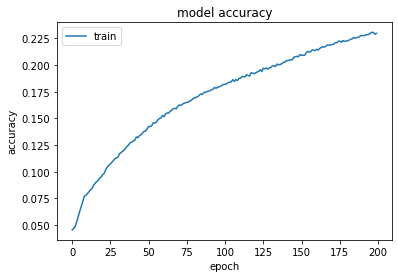

In [17]:
print(his5.history.keys())
# summarize history for accuracy
plt.plot(his5.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
## Bidirectional - LSTM
sample = Sequential()
sample.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
sample.add(Bidirectional(LSTM(20)))
sample.add(Dense(total_words, activation='softmax'))
sample.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = sample.fit(input_sequences, one_hot_labels, epochs=epoch, verbose=1)

Epoch 1/200
1480/1480 [==============================] - 109s 71ms/step - loss: 5.9845 - accuracy: 0.0464
Epoch 2/200
1480/1480 [==============================] - 109s 73ms/step - loss: 5.6710 - accuracy: 0.0504
Epoch 3/200
1480/1480 [==============================] - 109s 74ms/step - loss: 5.4206 - accuracy: 0.0729
Epoch 4/200
1480/1480 [==============================] - 102s 69ms/step - loss: 5.1933 - accuracy: 0.1023
Epoch 5/200
1480/1480 [==============================] - 101s 68ms/step - loss: 5.0035 - accuracy: 0.1198
Epoch 6/200
1480/1480 [==============================] - 101s 68ms/step - loss: 4.8432 - accuracy: 0.1382
Epoch 7/200
1480/1480 [==============================] - 101s 68ms/step - loss: 4.6994 - accuracy: 0.1516
Epoch 8/200
1480/1480 [==============================] - 102s 69ms/step - loss: 4.5716 - accuracy: 0.1662
Epoch 9/200
1480/1480 [==============================] - 102s 69ms/step - loss: 4.4527 - accuracy: 0.1800
Epoch 10/200
1480/1480 [======================

1480/1480 [==============================] - 103s 70ms/step - loss: 2.1298 - accuracy: 0.5352
Epoch 154/200
1480/1480 [==============================] - 102s 69ms/step - loss: 2.1165 - accuracy: 0.5371
Epoch 155/200
1480/1480 [==============================] - 104s 70ms/step - loss: 2.1380 - accuracy: 0.5331
Epoch 156/200
1480/1480 [==============================] - 102s 69ms/step - loss: 2.1169 - accuracy: 0.5370
Epoch 157/200
1480/1480 [==============================] - 103s 69ms/step - loss: 2.1126 - accuracy: 0.5372
Epoch 158/200
1480/1480 [==============================] - 102s 69ms/step - loss: 2.1076 - accuracy: 0.5394
Epoch 159/200
1480/1480 [==============================] - 104s 70ms/step - loss: 2.1011 - accuracy: 0.5419
Epoch 160/200
1480/1480 [==============================] - 104s 70ms/step - loss: 2.1132 - accuracy: 0.5373
Epoch 161/200
1480/1480 [==============================] - 103s 70ms/step - loss: 2.0948 - accuracy: 0.5399
Epoch 162/200
1480/1480 [=================

dict_keys(['loss', 'accuracy'])


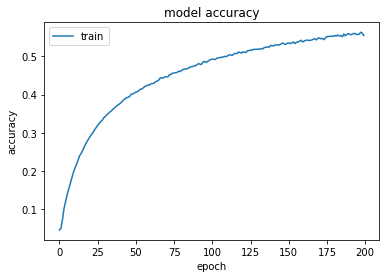

In [19]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()